WeatherPy

Analysis

As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Job6/output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=saint-augustin
Processing Record 2 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=georgetown
Processing Record 3 | Griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=griffith
Processing Record 4 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=jamestown
Processing Record 5 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=bambous virieux
Processing Record 6 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=ushuaia
Processing Record 7 | Omsukchan
http://api.openweatherm

Processing Record 57 | Yolombo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=yolombo
Processing Record 58 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=bonavista
City not found...
Processing Record 59 | Alwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=alwar
Processing Record 60 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=palmer
Processing Record 61 | Udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=udachnyy
Processing Record 62 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=atuona
Processing Record 63 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef

Processing Record 113 | Dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=dali
City not found...
Processing Record 114 | Syracuse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=syracuse
City not found...
Processing Record 115 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=lavrentiya
Processing Record 116 | Partur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=partur
Processing Record 117 | Temir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=temir
City not found...
Processing Record 118 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=port macquarie
Processing Record 119 | Salym
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 168 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=codrington
Processing Record 169 | Magdagachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=magdagachi
Processing Record 170 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nanortalik
Processing Record 171 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=hilo
Processing Record 172 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=chicama
Processing Record 173 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=aasiaat
Processing Record 174 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a

Processing Record 224 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=qaqortoq
Processing Record 225 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=tuatapere
Processing Record 226 | Cachoeira do Sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=cachoeira do sul
Processing Record 227 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=marzuq
Processing Record 228 | Fermoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=fermoy
City not found...
Processing Record 229 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=sao joao da barra
Processing Record 230 | Machinga
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 280 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kamenka
Processing Record 281 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=port augusta
Processing Record 282 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=mayo
Processing Record 283 | Pinchote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=pinchote
Processing Record 284 | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=antalaha
Processing Record 285 | Ovalle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=ovalle
Processing Record 286 | Tambun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=ta

Processing Record 337 | Kyshtovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kyshtovka
Processing Record 338 | Kandrian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kandrian
Processing Record 339 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=moose factory
Processing Record 340 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=clyde river
Processing Record 341 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=tromso
Processing Record 342 | Castanos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=castanos
Processing Record 343 | Agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431

Processing Record 392 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=paamiut
Processing Record 393 | Palu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=palu
Processing Record 394 | Quimper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=quimper
Processing Record 395 | Lasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=lasem
Processing Record 396 | Zunheboto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=zunheboto
Processing Record 397 | Miami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=miami
Processing Record 398 | Nisia Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nisia flor

Processing Record 449 | Savannah Bight
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=savannah bight
Processing Record 450 | Gunjur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=gunjur
Processing Record 451 | Paso de los Toros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=paso de los toros
Processing Record 452 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=chernyshevskiy
Processing Record 453 | Santa Rosalia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=santa rosalia
Processing Record 454 | Fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=fomboni
City not found...
Processing Record 455 | Steinbach
http://api.openweathermap.org/da

Processing Record 505 | Sann
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=sann
Processing Record 506 | Codajas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=codajas
Processing Record 507 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=viedma
Processing Record 508 | Coruripe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=coruripe
Processing Record 509 | Zihuatanejo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=zihuatanejo
Processing Record 510 | Qingdao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=qingdao
Processing Record 511 | Ferkessedougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [8]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [11]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Augustin,0,FR,1554078037,66,44.83,-0.61,48.20,2.24
1,Georgetown,20,GY,1554073200,74,6.80,-58.16,84.20,9.17
2,Griffith,24,AU,1554078020,59,-34.29,146.06,68.00,5.82
3,Jamestown,20,AU,1554078155,80,-33.21,138.60,57.50,4.29
4,Bambous Virieux,75,MU,1554077942,94,-20.34,57.76,75.99,4.70


 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

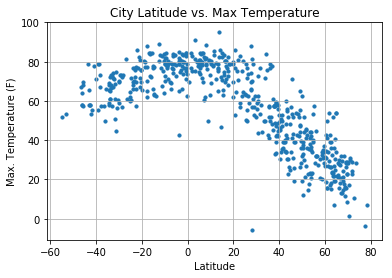

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

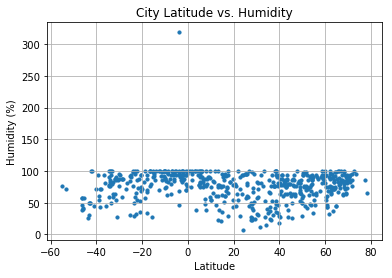

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

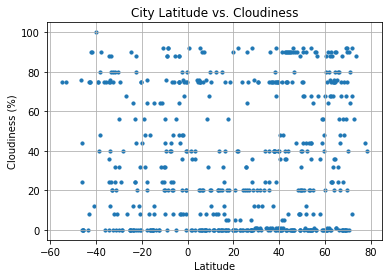

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

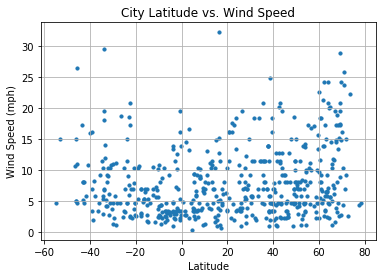

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()